In [1]:
#https://machinelearningmastery.com/arima-for-time-series-forecasting-with-python/

Month
1-01    266.0
1-02    145.9
1-03    183.1
1-04    119.3
1-05    180.3
Name: Sales, dtype: float64


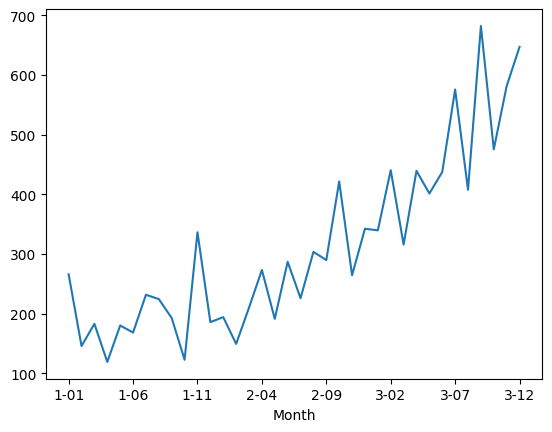

In [2]:
import pandas as pd
from pandas import read_csv
from datetime import datetime  # Use the built-in datetime module
from matplotlib import pyplot
 
def parser(x):
    return datetime.strptime('190' + x, '%Y-%m')

# Read CSV without the 'squeeze' argument
series = read_csv('shampoo_sales.csv', header=0, parse_dates=[0], index_col=0, date_format=parser)

# If you want the result as a Series (for single-column DataFrame)
series = series.squeeze()

print(series.head())
series.plot()
pyplot.show()

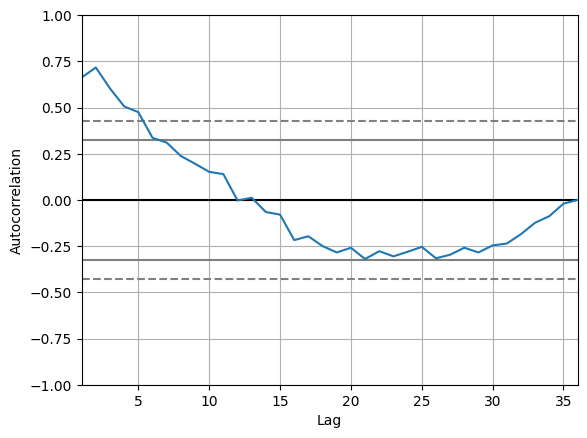

In [3]:
from pandas.plotting import autocorrelation_plot
autocorrelation_plot(series)
pyplot.show()

In [4]:
# fit an ARIMA model and plot residual errors
from statsmodels.tsa.arima.model import ARIMA
series.index = series.index.to_period('M')

AttributeError: 'Index' object has no attribute 'to_period'

In [ ]:
# fit model
model = ARIMA(series, order=(5,1,0))
model_fit = model.fit()

In [ ]:
# summary of fit model
print(model_fit.summary())
# line plot of residuals
residuals = pd.DataFrame(model_fit.resid)
residuals.plot()
pyplot.show()
# density plot of residuals
residuals.plot(kind='kde')
pyplot.show()
# summary stats of residuals
print(residuals.describe())

In [ ]:
from sklearn.metrics import mean_squared_error
from math import sqrt
# split into train and test sets
X = series.values
size = int(len(X) * 0.66)
train, test = X[0:size], X[size:len(X)]
history = [x for x in train]
predictions = list()
# walk-forward validation
for t in range(len(test)):
    model = ARIMA(history, order=(5,1,0))
    model_fit = model.fit()
    output = model_fit.forecast()
    yhat = output[0]
    predictions.append(yhat)
    obs = test[t]
    history.append(obs)
    print('predicted=%f, expected=%f' % (yhat, obs))
# evaluate forecasts
rmse = sqrt(mean_squared_error(test, predictions))
print('Test RMSE: %.3f' % rmse)
# plot forecasts against actual outcomes
pyplot.plot(test)
pyplot.plot(predictions, color='red')
pyplot.show()